In [36]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [16]:
# Define paths to your dataset folders
folder_paths = [
    "C:/cybersec-imagery/artificial intelligence/2016-11-04T16_23_18.817051",
#     "C:/cybersec-imagery/biosensing/2016-11-10T00_00_16.886164"
    "C:/cybersec-imagery/bodycam/2017-01-30T06_00_15.422468"
]

# Initialize lists to store images and labels
images = []
labels = []

# Load images and assign labels
for label, folder_path in enumerate(folder_paths):
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        images.append(image)
        labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)


C:\Users\vaide\AppData\Local\Temp\ipykernel_16180\4159395334.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


In [17]:
IMG_WIDTH = 224
IMG_HEIGHT = 224
# Resize images to a fixed size
resized_images = [cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT)) for img in images]

# Convert resized_images to numpy array
resized_images = np.array(resized_images)

# Normalize pixel values
normalized_images = resized_images / 255.0


In [13]:
# Resize images to a fixed size
resized_images = []
for img in images:
    if img is not None:  # Add error handling for empty images
        print("Image shape before resizing:", img.shape)
        resized_img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
        print("Image shape after resizing:", resized_img.shape)
        resized_images.append(resized_img)
    else:
        print("Error: Empty image encountered")

# Convert resized_images to numpy array
resized_images = np.array(resized_images)

# Normalize pixel values
normalized_images = resized_images / 255.0


Image shape before resizing: (1000, 1500, 3)
Image shape after resizing: (224, 224, 3)
Image shape before resizing: (225, 378, 3)
Image shape after resizing: (224, 224, 3)
Image shape before resizing: (210, 318, 3)
Image shape after resizing: (224, 224, 3)
Image shape before resizing: (400, 700, 3)
Image shape after resizing: (224, 224, 3)
Image shape before resizing: (675, 900, 3)
Image shape after resizing: (224, 224, 3)
Image shape before resizing: (456, 810, 3)
Image shape after resizing: (224, 224, 3)
Image shape before resizing: (350, 635, 3)
Image shape after resizing: (224, 224, 3)
Image shape before resizing: (2412, 3600, 3)
Image shape after resizing: (224, 224, 3)
Image shape before resizing: (434, 651, 3)
Image shape after resizing: (224, 224, 3)
Image shape before resizing: (306, 306, 3)
Image shape after resizing: (224, 224, 3)
Image shape before resizing: (1000, 2000, 3)
Image shape after resizing: (224, 224, 3)
Image shape before resizing: (432, 736, 3)
Image shape afte

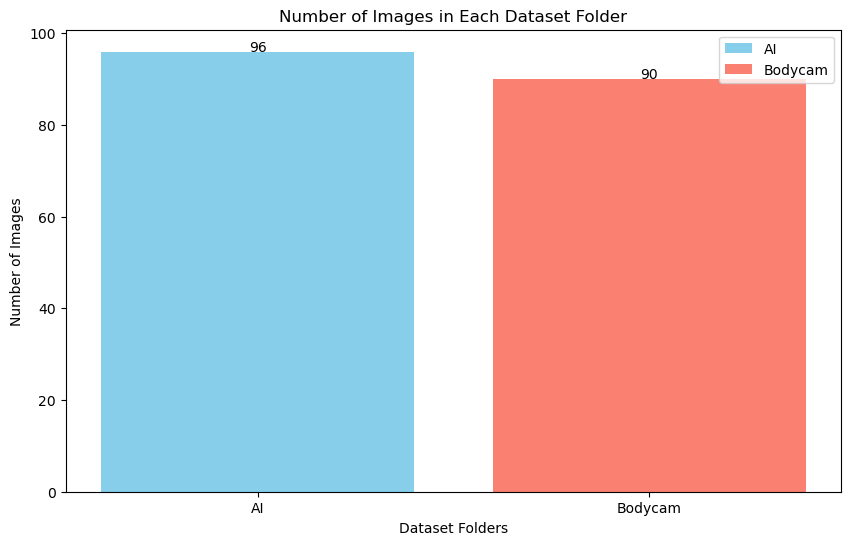

In [21]:

num_images_per_folder = []

# Count the number of images in each folder
for folder_path in folder_paths:
    num_images = len(os.listdir(folder_path))
    num_images_per_folder.append(num_images)

# Define colors for each dataset folder
colors = ['skyblue', 'salmon']

# Plot histogram
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(folder_paths)), num_images_per_folder, color=colors)
plt.xlabel('Dataset Folders')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Dataset Folder')
plt.xticks(range(len(folder_paths)), ['AI', 'Bodycam'])  # Assuming 'AI' and 'Bodycam' are labels

# Add numbers on top of each bar
for bar, num_images in zip(bars, num_images_per_folder):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, num_images, ha='center', color='black')

# Add legend
plt.legend(bars, ['AI', 'Bodycam'])

plt.show()

Images in folder: AI


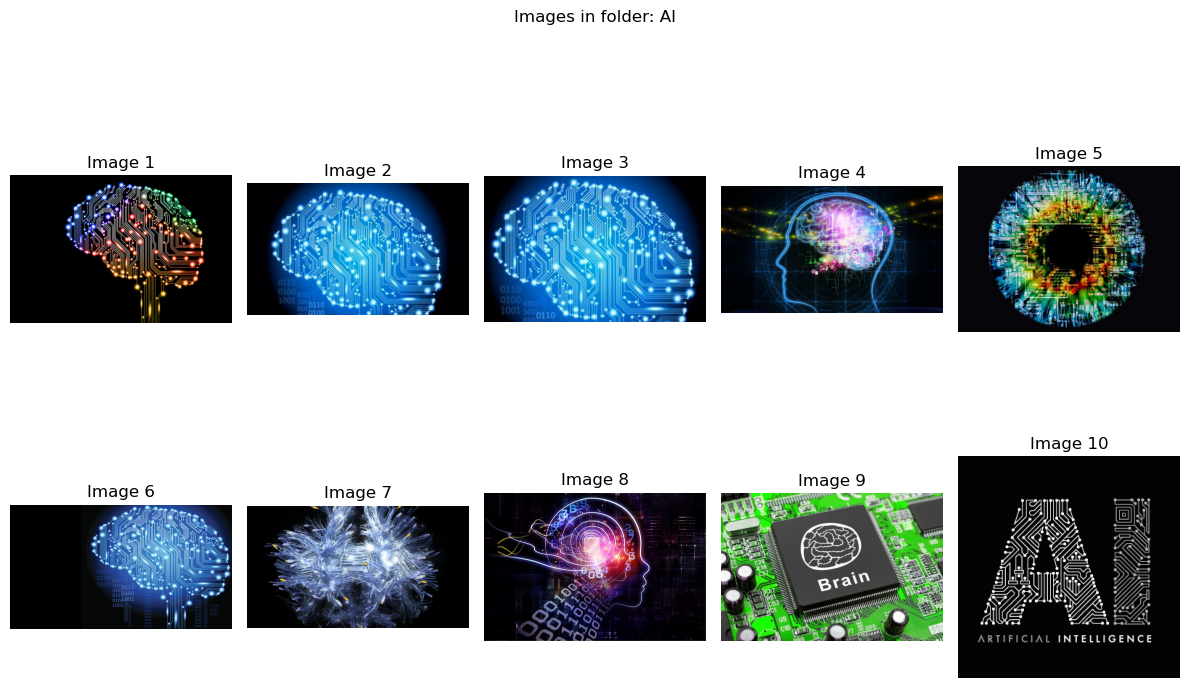

Images in folder: Bodycam


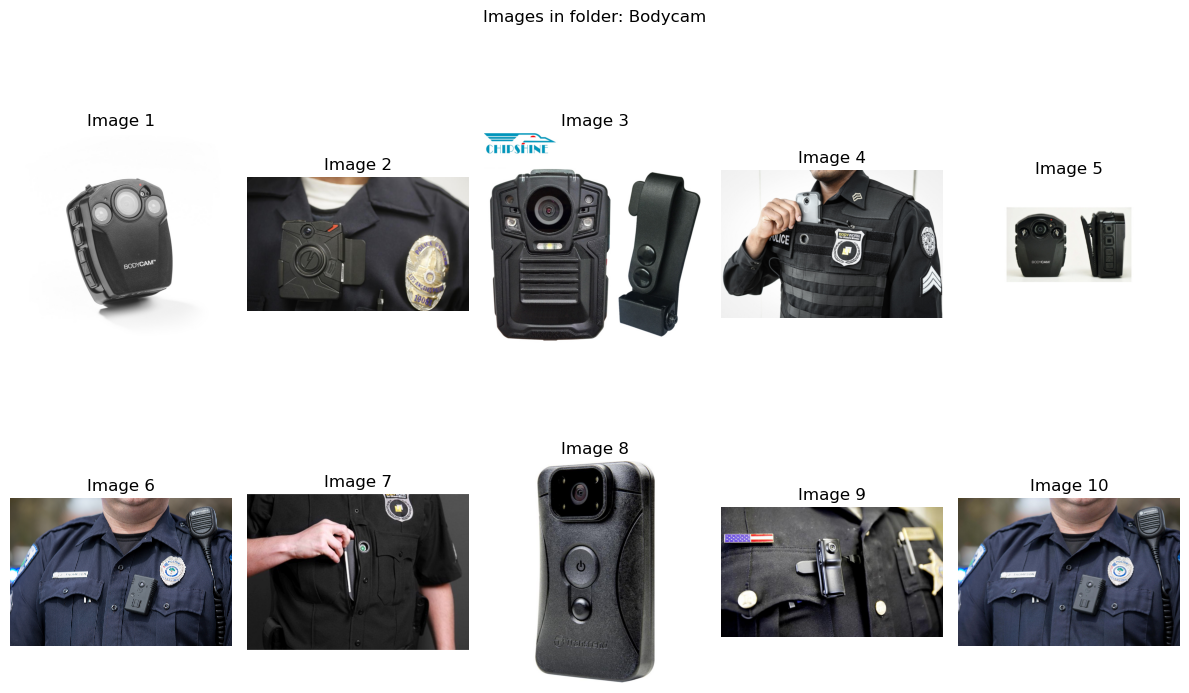

In [29]:
labels = ['AI', 'Bodycam']

# Display images from each folder
for folder_path, label in zip(folder_paths, labels):
    print(f"Images in folder: {label}")
    plt.figure(figsize=(12, 8))
    for i, filename in enumerate(os.listdir(folder_path)):
        if i >= 10:  # Show only 10 images per folder
            break
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.subplot(2, 5, i+1)  # Display in a 2x5 grid
        plt.imshow(image)
        plt.title(f"Image {i+1}")
        plt.axis('off')
    plt.suptitle(f"Images in folder: {label}")
    plt.tight_layout()
    plt.show()


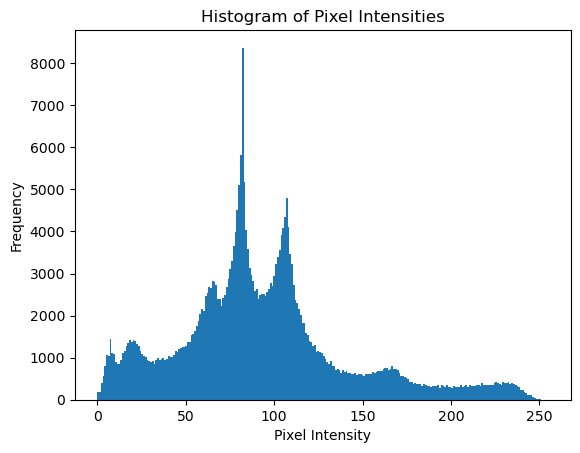

In [35]:
import cv2
import matplotlib.pyplot as plt

# File path of the image
image_path = r"C:\cybersec-imagery\artificial intelligence\2016-11-04T16_23_18.817051\73.JPEG"

# Load the image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Unable to load the image from '{image_path}'")
else:
    # Plot histogram
    plt.hist(image.ravel(), bins=256, range=(0, 255))
    plt.title('Histogram of Pixel Intensities')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()


In [41]:

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Print the number of samples in each set
print("Number of training samples:", len(train_images))
print("Number of testing samples:", len(test_images))

Number of training samples: 148
Number of testing samples: 38
